   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  
0         42.8                0  
1         46.3                3  
2         49.4                5  
3         39.5                7  
4         40.0                9  
0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64
Accuracy: 0.963
F1 Score: 0.5963636363636363
Precision: 0.4659090909090909
Recall: 0.8282828282828283

Classification Report:
              precision    recall  f1-score   support

  No Failure       0.99      0.97      0.98      2901
     Failure       0.47      0.83      

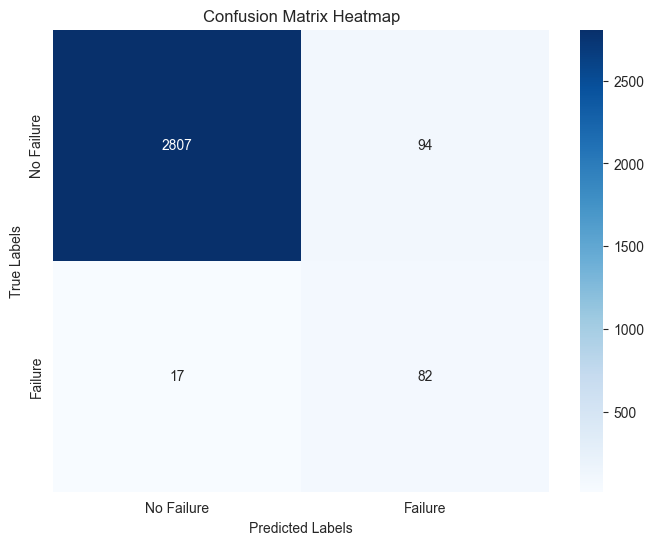

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv("/Users/bhushan/Documents/Python/MachineFailure/dataset/ai4i2020.csv")
X = dataset.drop(columns=['UDI', 'Product ID', 'Type','Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = dataset['Machine failure']

print(X.head())
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Failure', 'Failure']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()